# import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
data={
    "Customer ID":np.arange(1,101),
    "Age": np.random.randint(18,65,size=100),
    "Average_Spend": np.random.uniform(5,50,size=100),
    "Visits_per_week": np.random.uniform(1,7,size=100),
    "Promotion_Interset":np.random.randint(1,11,size=100)
}

ds=pd.DataFrame(data)
ds.head()

,Customer ID,Age,Average_Spend,Visits_per_week,Promotion_Interset
0,1,56,18.206968,5.266897,2
1,2,46,5.633592,5.857006,9
2,3,32,13.947908,3.091996,8
3,4,60,37.010388,1.577059,10
4,5,25,40.557899,6.643140,7


# Find Cluster Number (Elbow Method)

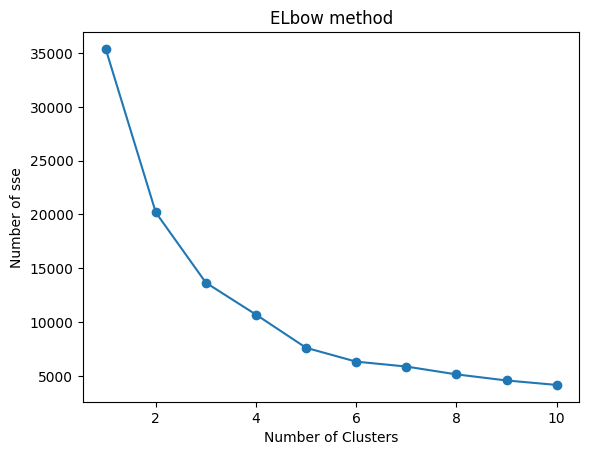

In [3]:
features = ds[['Age','Average_Spend','Visits_per_week','Promotion_Interset']]

sse=[]
k_range=range(1,11)

for k in k_range:
    kmean=KMeans(n_clusters=k,random_state=42)
    kmean.fit(features)
    sse.append(kmean.inertia_)

plt.plot(k_range,sse,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Number of sse')
plt.title('ELbow method')
plt.show()



# Above Graph Shows that 3 Clusters Will Be Optimal

# Now Use Kmean to Cluster Your Input Features Into 3 clusters

In [4]:
kmean=KMeans(n_clusters=3,random_state=42)
ds['Cluster']=kmean.fit_predict(features)

In [16]:
Cluster_name={0:'Daily',1:'Weekends',2:'Promotions'}
ds['Cluster_Group']=ds['Cluster'].map(Cluster_name)
ds.value_counts()

Customer ID  Age  Average_Spend  Visits_per_week  Promotion_Interset  Cluster  Cluster_Group
1            56   18.206968      5.266897         2                   2        Promotions       1
2            46   5.633592       5.857006         9                   2        Promotions       1
3            32   13.947908      3.091996         8                   2        Promotions       1
4            60   37.010388      1.577059         10                  0        Daily            1
5            25   40.557899      6.643140         7                   1        Weekends         1
                                                                                               ..
96           24   27.868945      1.819728         10                  1        Weekends         1
97           26   36.311576      5.253466         10                  1        Weekends         1
98           41   43.626146      4.316920         3                   0        Daily            1
99           18   19.6681

# Visualize Your Clusters 

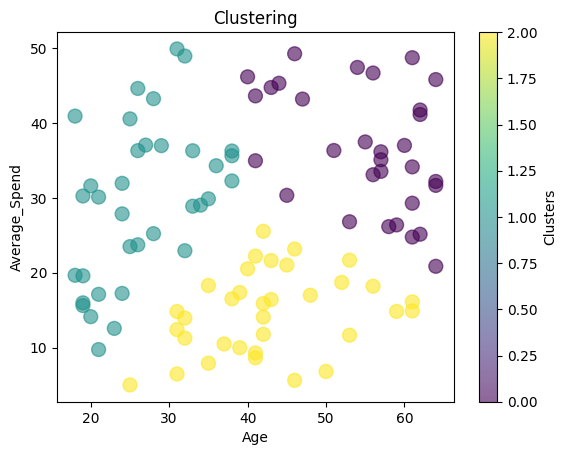

In [6]:
plt.scatter(ds['Age'],ds['Average_Spend'],c=ds['Cluster'],cmap='viridis',marker='o',s=100,alpha=0.6)

plt.xlabel('Age')
plt.ylabel('Average_Spend')
plt.title('Clustering')
plt.colorbar(label='Clusters')
plt.show()

# Find Accuracy

In [7]:
print(silhouette_score(features,ds['Cluster']))

0.36846369703368004


# Save and Load Model

In [8]:
import pickle
pickle.dump(kmean,open('KMEAN.pkl','wb'))
KMEAN=pickle.load(open('KMEAN.pkl','rb'))

# Prediction model

In [13]:
def Predict_Cluster(Age,Average_Spend,Visits_per_week,Promotion_Interset):
    new_customer=np.array([[Age,Average_Spend,Visits_per_week,Promotion_Interset]])
    predicted_cluster=KMEAN.predict(new_customer)


    if predicted_cluster==[0]:
        print("Give him loyalty reward ")
    elif predicted_cluster == [1]:
        print("Give him weekend Warrior reward")
    else:
        print("Give him discount on Off promotion days")
    




In [15]:
Age=60
Average_Spend=37.010388
Visits_per_week=1.577059	
Promotion_Interset=10
Predict_Cluster(Age,Average_Spend,Visits_per_week,Promotion_Interset)

Give him loyalty reward 


D:\ML\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# View Model in 3D

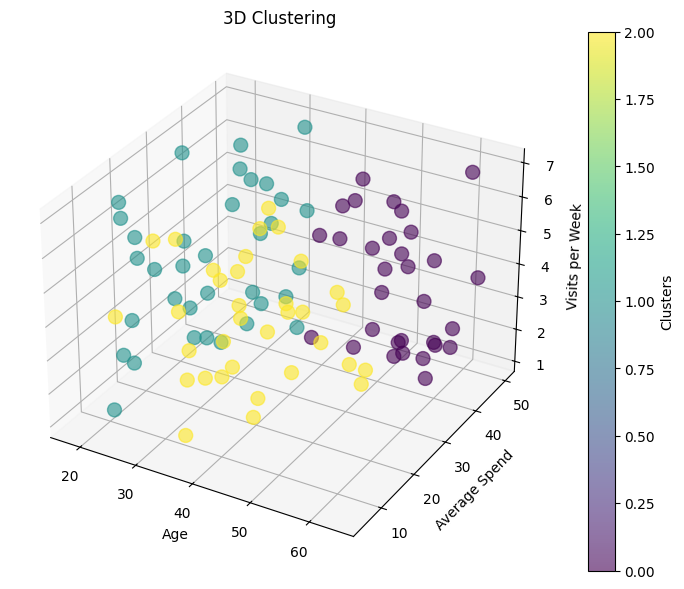

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    ds['Age'], 
    ds['Average_Spend'], 
    ds['Visits_per_week'], 
    c=ds['Cluster'], 
    cmap='viridis', 
    marker='o', 
    s=100, 
    alpha=0.6
)

ax.set_xlabel('Age')
ax.set_ylabel('Average Spend')
ax.set_zlabel('Visits per Week')
ax.set_title('3D Clustering')

plt.colorbar(sc, label='Clusters')

plt.show()
